In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [43]:
pd.set_option('display.max_columns', 500)
sns.set_style("ticks")

In [44]:
data = pd.read_csv('/Users/cesar/Desktop/tennis_atp/atp_matches_2010.csv')
for annee in range(2000, 2020):
    data = pd.concat([data, pd.read_csv('/Users/cesar/Desktop/tennis_atp/atp_matches_'+str(annee)+'.csv')], axis=0)

In [45]:
data['tourney_date'] = pd.to_datetime(data['tourney_date'], yearfirst=True, format='%Y%m%d')

In [46]:
data = data[~data['tourney_name'].str.startswith('Davis Cup')].copy()
data.dropna(subset=['minutes'], inplace=True)

In [47]:
data_winner = data[data.columns]
data_loser = data[data.columns]

In [48]:
data_winner.rename({'winner_name':'player_name'}, inplace=True)
data_loser.rename({'loser_name':'player_name'}, inplace=True)

In [49]:
data_winner['win_lose'] = ['w' for i in range(len(data_winner))]
data_winner['win_lose'] = ['l' for i in range(len(data_loser))]

In [50]:
data_winner = data_winner.rename(columns=lambda x: re.sub('winner','player',x))
data_winner = data_winner.rename(columns=lambda x: re.sub('^w_','player_',x))
data_winner = data_winner.rename(columns=lambda x: re.sub('loser','opponent',x))
data_winner = data_winner.rename(columns=lambda x: re.sub('^l_','opponent_',x))

data_loser = data_loser.rename(columns=lambda x: re.sub('loser','player',x))
data_loser = data_loser.rename(columns=lambda x: re.sub('^l_','player_',x))
data_loser = data_loser.rename(columns=lambda x: re.sub('winner','opponent',x))
data_loser = data_loser.rename(columns=lambda x: re.sub('^w_','opponent_',x))

In [51]:
data = pd.concat([data_winner, data_loser], axis=0)
data.reset_index(inplace=True, drop=True)

/anaconda3/envs/ASA/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [52]:
data['year'] = data['tourney_date'].apply(lambda x: x.year)

In [53]:
def plot_time_per_player(name):
    joueur = data[data['player_name']==name]
    moyenne_joueur = joueur['minutes'].mean()
    annees = joueur['year'].sort_values().unique()
    moyennes_annuelles = np.zeros(annees.shape[0])
    for i, annee in enumerate(annees):
        moyennes_annuelles[i] = joueur[joueur['year']==annee]['minutes'].mean()
    plt.figure(figsize=(10,5))
    plt.plot(annees, moyennes_annuelles, color="red")
    plt.plot(annees, [moyenne_joueur for i in range(len(annees))], color='grey')
    plt.title(name)
    plt.xticks(annees.astype('int'))
    plt.tight_layout(pad=2)
    sns.despine()
    plt.show()

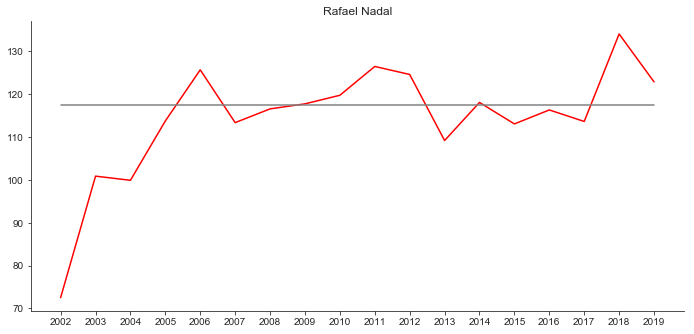

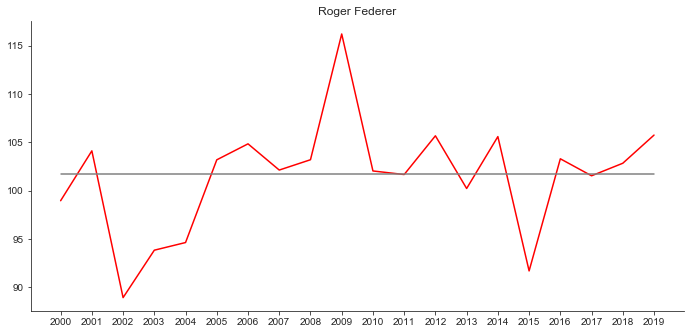

In [54]:
for i in ['Rafael Nadal', 'Roger Federer']:
    plot_time_per_player(i)

In [55]:
moyenne_globale = data['minutes'].mean()
annees = data['year'].sort_values().unique()
moyennes_annuelles = {}
for annee in annees:
    moyennes_annuelles[annee] = data[data['year']==annee]['minutes'].mean()

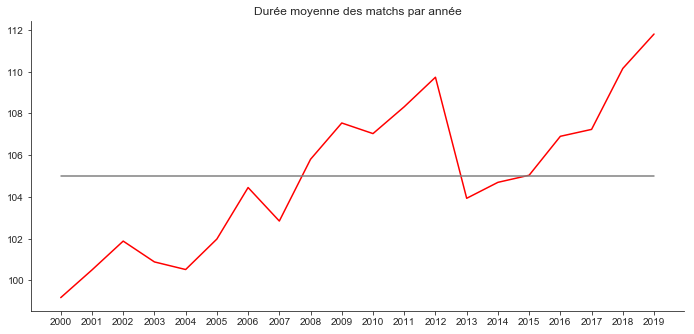

In [56]:
plt.figure(figsize=(10,5))
plt.plot(sorted(list(moyennes_annuelles.keys())), 
         [moyennes_annuelles[annee] for annee in sorted(list(moyennes_annuelles.keys()))], 
         color="red")
plt.plot(sorted(list(moyennes_annuelles.keys())), 
         [moyenne_globale for i in range(len(moyennes_annuelles.keys()))], 
         color='grey')
plt.title('Durée moyenne des matchs par année')
plt.xticks(annees.astype('int'))
plt.tight_layout(pad=2)
sns.despine()
plt.show()

In [57]:
data.groupby('surface')['minutes'].mean()

surface
Carpet     93.107671
Clay      105.625608
Grass     110.654613
Hard      104.023903
Name: minutes, dtype: float64

In [58]:
data.groupby('tourney_name')['minutes'].mean()

tourney_name
's-Hertogenbosch        89.214660
ATP Next Gen Finals     89.125000
Acapulco                99.428571
Adelaide                88.624561
Amersfoort              93.259434
                          ...    
Wimbledon              140.780584
Winston-Salem           93.911528
Zagreb                  97.098765
Zhuhai                 103.074074
s-Hertogenbosch         86.206731
Name: minutes, Length: 126, dtype: float64

In [59]:
data[data['tourney_name']=='Wimbledon']['minutes'].describe()

count    5068.000000
mean      140.780584
std        48.068778
min        12.000000
25%       106.000000
50%       133.000000
75%       170.000000
max       665.000000
Name: minutes, dtype: float64

In [60]:
data[(data['year']==2019)].groupby('surface')['minutes'].mean()

surface
Clay     112.811856
Grass    117.288820
Hard     109.982882
Name: minutes, dtype: float64

In [61]:
data[data['surface']=='Grass']['minutes']

1360       64.0
1361       97.0
1362      133.0
1363      149.0
1364       71.0
          ...  
111651     86.0
111652     44.0
111653    110.0
111654    125.0
111655    136.0
Name: minutes, Length: 12334, dtype: float64

In [62]:
data.head(1)

,best_of,draw_size,match_num,minutes,opponent_1stIn,opponent_1stWon,opponent_2ndWon,opponent_SvGms,opponent_ace,opponent_age,opponent_bpFaced,opponent_bpSaved,opponent_df,opponent_entry,opponent_hand,opponent_ht,opponent_id,opponent_ioc,opponent_name,opponent_rank,opponent_rank_points,opponent_seed,opponent_svpt,player_1stIn,player_1stWon,player_2ndWon,player_SvGms,player_ace,player_age,player_bpFaced,player_bpSaved,player_df,player_entry,player_hand,player_ht,player_id,player_ioc,player_name,player_rank,player_rank_points,player_seed,player_svpt,round,score,surface,tourney_date,tourney_id,tourney_level,tourney_name,win_lose,year
0,3,32,1,84.0,34.0,29.0,11.0,10.0,4.0,30.346338,5.0,3.0,2.0,NaN,R,183.0,103429,AUS,Peter Luczak,77.0,598.0,NaN,56.0,42.0,36.0,14.0,10.0,15.0,27.348392,3.0,3.0,0.0,NaN,R,188.0,104053,USA,Andy Roddick,7.0,4410.0,1,63.0,R32,7-6(5) 6-2,Hard,2010-01-03,2010-339,A,Brisbane,l,2010


In [76]:
data['opponent_SvGms'].unique()

array([10.,  9., 14., 12.,  7.,  8., 18., 16., 11.,  6., 15., 13.,  3.,
        5.,  2., 17., 22., 21., 23., 19., 28., 27., 24., 20., 25., 30.,
        4.,  1.,  0., 34., 26., 31., 37., 91., 29., 40., 32., 33., 41.,
       35., 36., nan, 38., 39., 50., 90., 42., 49.])

In [78]:
data.head()

,best_of,draw_size,match_num,minutes,opponent_1stIn,opponent_1stWon,opponent_2ndWon,opponent_SvGms,opponent_ace,opponent_age,opponent_bpFaced,opponent_bpSaved,opponent_df,opponent_entry,opponent_hand,opponent_ht,opponent_id,opponent_ioc,opponent_name,opponent_rank,opponent_rank_points,opponent_seed,opponent_svpt,player_1stIn,player_1stWon,player_2ndWon,player_SvGms,player_ace,player_age,player_bpFaced,player_bpSaved,player_df,player_entry,player_hand,player_ht,player_id,player_ioc,player_name,player_rank,player_rank_points,player_seed,player_svpt,round,score,surface,tourney_date,tourney_id,tourney_level,tourney_name,win_lose,year
0,3,32,1,84.0,34.0,29.0,11.0,10.0,4.0,30.346338,5.0,3.0,2.0,NaN,R,183.0,103429,AUS,Peter Luczak,77.0,598.0,NaN,56.0,42.0,36.0,14.0,10.0,15.0,27.348392,3.0,3.0,0.0,NaN,R,188.0,104053,USA,Andy Roddick,7.0,4410.0,1,63.0,R32,7-6(5) 6-2,Hard,2010-01-03,2010-339,A,Brisbane,l,2010
1,3,32,2,70.0,34.0,22.0,14.0,9.0,2.0,22.370979,10.0,7.0,2.0,NaN,L,190.0,104999,GER,Mischa Zverev,78.0,590.0,NaN,66.0,30.0,23.0,19.0,10.0,10.0,22.543463,0.0,0.0,3.0,WC,L,198.0,104958,AUS,Carsten Ball,134.0,400.0,NaN,57.0,R32,7-5 6-1,Hard,2010-01-03,2010-339,A,Brisbane,l,2010
2,3,32,3,121.0,58.0,38.0,14.0,14.0,4.0,28.451745,11.0,7.0,0.0,NaN,L,185.0,103813,FIN,Jarkko Nieminen,88.0,568.0,NaN,85.0,51.0,33.0,27.0,15.0,5.0,23.548255,8.0,5.0,4.0,NaN,R,185.0,104755,FRA,Richard Gasquet,52.0,850.0,NaN,97.0,R32,6-3 4-6 6-4,Hard,2010-01-03,2010-339,A,Brisbane,l,2010
3,3,32,4,64.0,29.0,16.0,15.0,9.0,2.0,28.621492,5.0,2.0,1.0,NaN,L,183.0,103781,AUT,Jurgen Melzer,28.0,1260.0,6,53.0,35.0,30.0,12.0,10.0,12.0,22.108145,3.0,3.0,1.0,Q,R,188.0,105051,AUS,Matthew Ebden,285.0,151.0,NaN,50.0,R32,7-5 6-1,Hard,2010-01-03,2010-339,A,Brisbane,l,2010
4,3,32,5,69.0,41.0,26.0,14.0,9.0,6.0,21.429158,9.0,6.0,1.0,Q,R,183.0,105194,AUS,Nick Lindahl,251.0,179.0,NaN,69.0,27.0,24.0,14.0,9.0,3.0,24.298426,1.0,1.0,1.0,NaN,R,196.0,104607,CZE,Tomas Berdych,20.0,1655.0,4,46.0,R32,6-2 6-4,Hard,2010-01-03,2010-339,A,Brisbane,l,2010


In [83]:
data['player_bpFaced'].describe()

count    112552.000000
mean          6.804322
std           4.438088
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          34.000000
Name: player_bpFaced, dtype: float64

In [84]:
data['player_bpFaced'].describe()

count    104894.000000
mean        185.516998
std           6.855339
min         163.000000
25%         180.000000
50%         185.000000
75%         190.000000
max         208.000000
Name: player_ht, dtype: float64

In [86]:
data['score'].describe()

count      112574
unique       9109
top       6-3 6-4
freq         3940
Name: score, dtype: object

In [82]:
len(data.score[0].split(' '))

2